# Project
## Analysis of tips data
## Student: Vitalijs Smirniovs
## ID: G00317774

### Tipping Data

Tipping data was recorded by one food server in a restorant and contains the following info on all customers he/she had served during a interval of two and a half months in early 1990. The restaurant,located in a suburban shopping mall, was one of a national chain and served a varied menu. The said restaurant offered seating in both non-smoking sand smoking ections to customers who requested it. The data was collected on the days and times when the food server was routinely assigned to work.[https://dicook.public.iastate.edu/stat503/05/cs-tips2.pdf] The idea behind collecting these data was that managers need to know what affects tipping so that could assign tables to waiters "equally", thu, giving the opportunity for each of them to earn similar amount.

So we will try to do this for this restaurant and figure out what affects tips in a restaurant. Or even can we reliably figure out the level of tips from observable customers' characteristics.

THe data set contains the following variables:
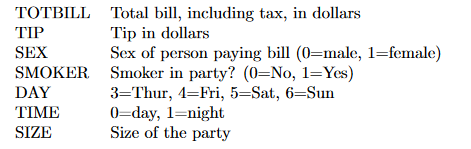

#### The plan of this project:
1. Summary stats and visuals
2. Relationship between vars: Correlations ( plotting data)
3. Regression analysis


In [2]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# load tips data
df = sns.load_dataset("tips")
# view top 5 rows of data
print(df.head())
# view last 5 rows of data
print(df.tail())
#data info
print(df.info())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          24

After loading tips data set as a data frame, we check if data loaded correctly. For this we call **heah/tail** commands. **data.info()** shows that three vars are numerical and four vars are categorical. The data set has 244 rows and 7 columns.

In [4]:
# summary stats for nmerical data
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


The average bill is approx 20 dollars, average tip is approx 3 dollars and average size of the party is 2.6 people (if we can describe people in fractions).

AS can be seen only numerical vars are shown after **describe()**. It would be nice to glance at our categorical vars. Did men in the 90s paid bills more often than women? Were there more skomers? On what days the waiter surved more people?

**value.counts()** halps to pull frequencies for categorical variables and plotting these values using seaborn **countplot()** allows us to visualise this frequencies by category.

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


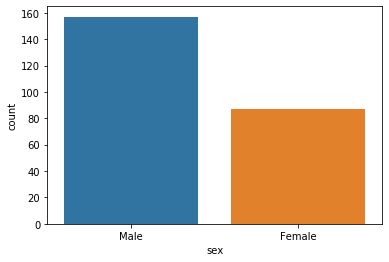

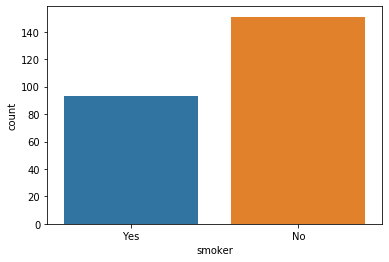

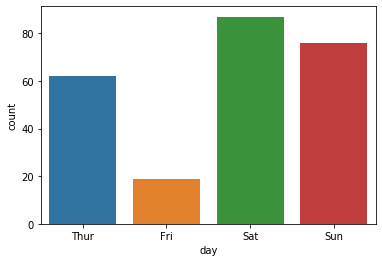

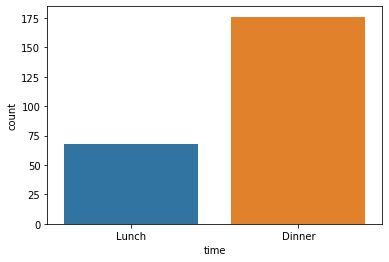

In [5]:
# print frequencis for categorical vars
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['day'].value_counts())
print(df['time'].value_counts())
# visualise
sns.countplot(x='sex', data=df)
plt.show()
sns.countplot(x='smoker', data=df)
plt.show()
sns.countplot(x='day', data=df)
plt.show()
sns.countplot(x='time', data=df)
plt.show()


So the said waiter served almost twice as many male bill payer as female. There were more people surved in non-smoking area. more people surved for dinner and more customers were served on Saturday. The way the data was collected it is hard to judge whether these info reflects the restaurant overall pattern or it is just coinsidental for this particular waiter.

Let's group our dataset by gender, smoking habits, day of the week and dinner vs lunch and see quickly if means vary by groups.

In [6]:
# group data by category and see if averages differ
# adapted from: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
grsex = df.groupby("sex")
grsmoker = df.groupby("smoker")
grday = df.groupby("day")
grtime = df.groupby("time")


Running **describe()** by groups created, we can see that mean total bill paid is higher for male than female customers and tipp is also higher for this group (which is expected as presumably customers pay a sort of percentage of the bill in tipps) howerver we can see tha median tipp is equal for both genders.

Similarly, the mean bill and tip for smokers is higher than for non-smokers.

Interstingly, the average bill is the highest on Saturday but the tip is the highest on Sunday.

Men, on average, came in bigger groups than women, so are non-smokers. On Sunday group size was on average bigger than on other days.

In [11]:
print(grsex.describe())
print(grsmoker.describe())
print(grday.describe())
print(grtime.describe())

       total_bill                                                         \
            count       mean       std   min    25%    50%    75%    max   
sex                                                                        
Male        157.0  20.744076  9.246469  7.25  14.00  18.35  24.71  50.81   
Female       87.0  18.056897  8.009209  3.07  12.75  16.40  21.52  44.30   

          tip            ...               size                                \
        count      mean  ...   75%   max  count      mean       std  min  25%   
sex                      ...                                                    
Male    157.0  3.089618  ...  3.76  10.0  157.0  2.630573  0.955997  1.0  2.0   
Female   87.0  2.833448  ...  3.50   6.5   87.0  2.459770  0.937644  1.0  2.0   

                       
        50%  75%  max  
sex                    
Male    2.0  3.0  6.0  
Female  2.0  3.0  6.0  

[2 rows x 24 columns]
       total_bill                                                     

May be a better way to display grouping data is by using **df.pivot()** as below. The tables printed have a neater shape to them and in my view easiyer to read.

In [12]:
# in this cell I describe for 2 groups smoker and sex to compare tip and size within male and female group
print(df.pivot(columns = 'smoker').describe())
print(df.pivot(columns = 'sex').describe())

       total_bill                    tip                   size            
smoker        Yes          No        Yes          No        Yes          No
count   93.000000  151.000000  93.000000  151.000000  93.000000  151.000000
mean    20.756344   19.188278   3.008710    2.991854   2.408602    2.668874
std      9.832154    8.255582   1.401468    1.377190   0.810751    1.017984
min      3.070000    7.250000   1.000000    1.000000   1.000000    1.000000
25%     13.420000   13.325000   2.000000    2.000000   2.000000    2.000000
50%     17.920000   17.590000   3.000000    2.740000   2.000000    2.000000
75%     26.860000   22.755000   3.680000    3.505000   3.000000    3.000000
max     50.810000   48.330000  10.000000    9.000000   5.000000    6.000000
       total_bill                    tip                   size           
sex          Male     Female        Male     Female        Male     Female
count  157.000000  87.000000  157.000000  87.000000  157.000000  87.000000
mean    20.7440

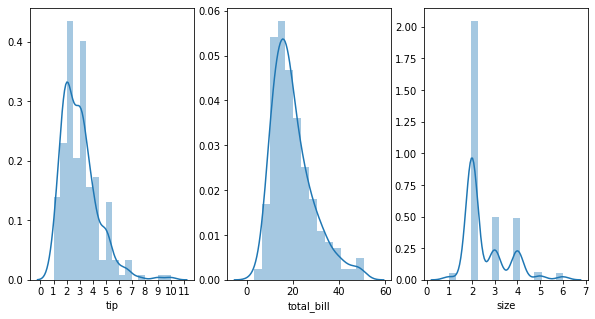

In [36]:
# adapted from: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
# and: https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
# https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
import matplotlib.ticker as ticker
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1=sns.distplot(df["tip"], ax=ax1)
ax2= sns.distplot(df["total_bill"],  ax=ax2)
ax3= sns.distplot(df["size"],  ax=ax3)
tick_spacing = 1
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax3.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

Figures above allow one to see the distribution of variables. It seems that tip and total bill have a bell shaped distribution slightly skewed to the left. While size of the party was predominanty 2, which is expected for a restaurant.

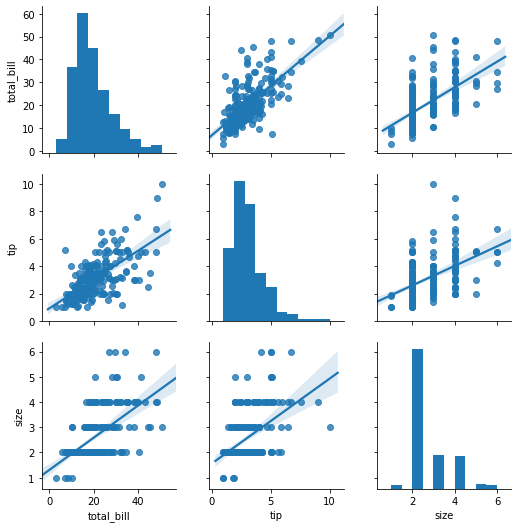

In [46]:
sns.pairplot(data=df, kind="reg")
plt.show()

Seaborn **pairplot()** with regression line is an excellent way to see if there is a relationship between quntitative variables. AS suspected before, we can now confirm that the hicher the bill - the higher the tip, the bigger the group - the higher the tip.

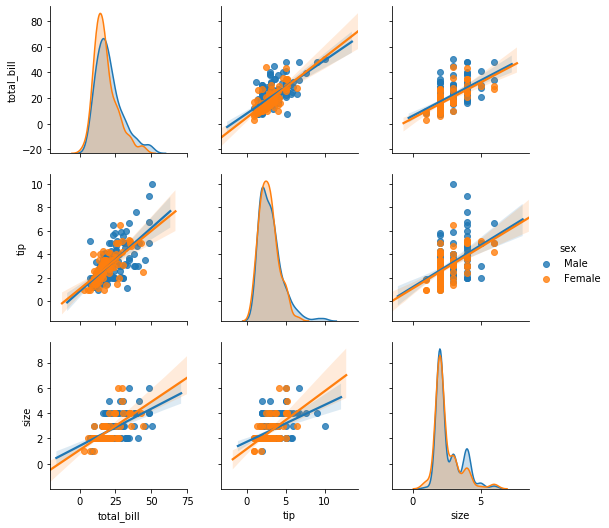

In [57]:
sns.pairplot(data=df, kind="reg", hue="sex")
plt.show()

Let's explore byt gender. It seems that the line is steaper for female bill-payer for bill and tip as the size went up. May be male bill-payers spend more and tipp more in bigger groups?

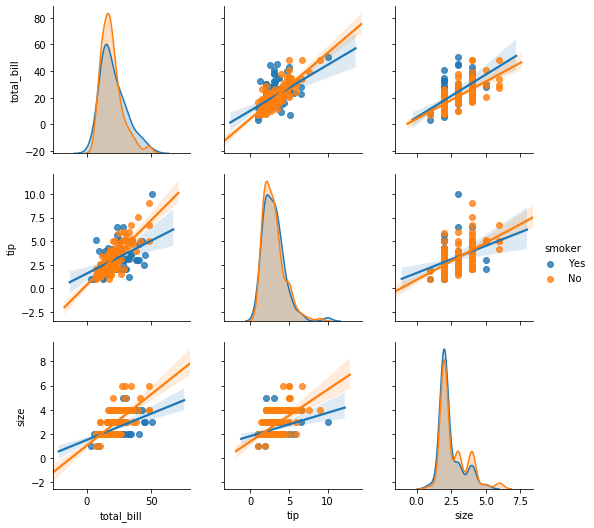

In [58]:
sns.pairplot(data=df, kind="reg", hue="smoker")
plt.show()

From the pairplots above it seems that regression lines is steaper for non-smokers for tipping. Are non-smokers more generous tippers?

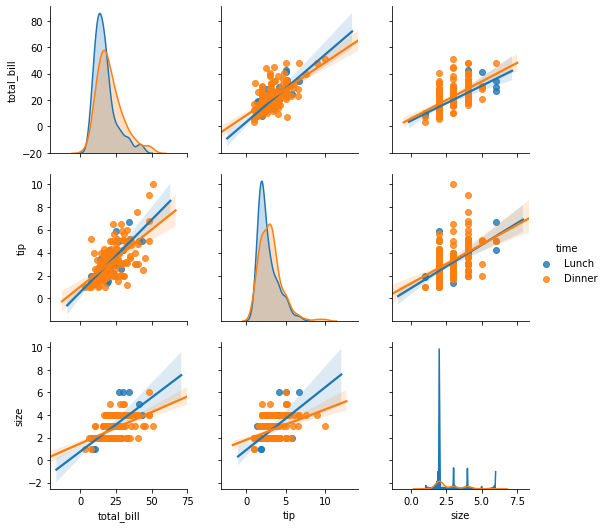

In [59]:
sns.pairplot(data=df, kind="reg", hue="time")
plt.show()

We would expect that people spend more for dinner and would be more generous in tipping (may be drinking a bit and becoming more joly?).

However, the pairplots above show that tipping regression lines are steaper for lunch.

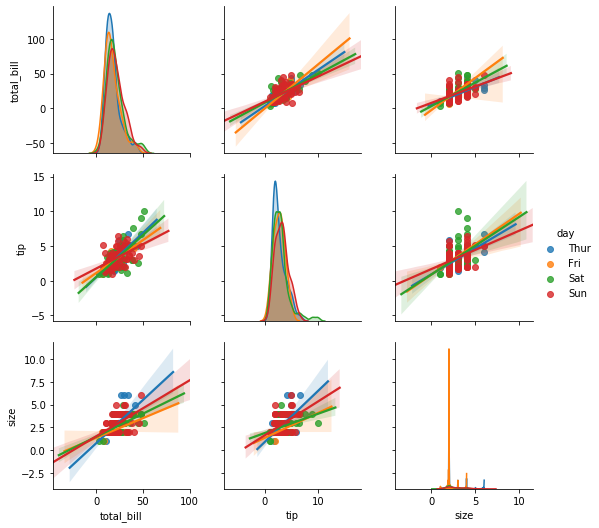

In [60]:
sns.pairplot(data=df, kind="reg", hue="day")
plt.show()

It looks like the tpping regression line is steaper on Thursdays.

Differences between the groups are normally ploted on box plots.

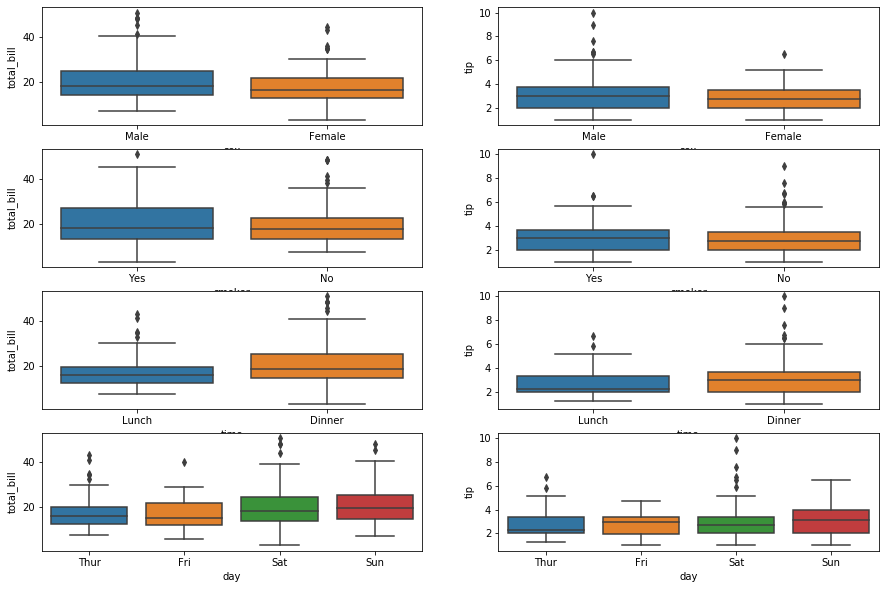

In [78]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))
plt.subplot(421)
sns.boxplot("sex", y = "total_bill", data = df)
plt.subplot(422)
sns.boxplot("sex", y = "tip", data = df)
plt.subplot(423)
sns.boxplot("smoker", y = "total_bill", data = df)
plt.subplot(424)
sns.boxplot("smoker", y = "tip", data = df)
plt.subplot(425)
sns.boxplot("time", y = "total_bill", data = df)
plt.subplot(426)
sns.boxplot("time", y = "tip", data = df)
plt.subplot(427)
sns.boxplot("day", y = "total_bill", data = df)
plt.subplot(428)
sns.boxplot("day", y = "tip", data = df)
plt.show()



Box plots are used to show overall patterns of response for a group. They provide a useful way to visualise the range and other characteristics of responses for a large group. Any obvious difference between box plots for comparative groups is worthy of further investigation. [https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots]

Boxplots show that there is high variation in expenditure by male customers and in tipping (a lot of outliers). While female box for expenditure and tipp is "tighter", pleaning that values cluster closer together. THis may mean that what men spend or tip is harder to predict.

There is higher variation in expenditure by smokers but otherwise, it looks like expenditure and tipping patterns are similar.

Although people seems to spent more for Dinner on average, we can see that the bottom wiskers of the boxplot fot Dinner is lowe, higher variation, the same is true for tips.

Total bill is higher for weeknds but th median tipp seems very similar by day.

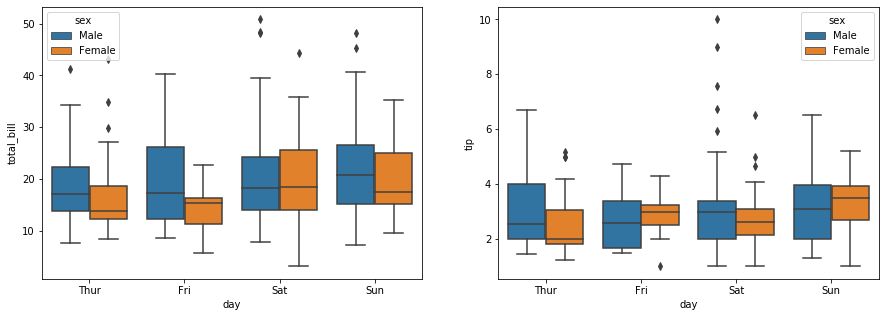

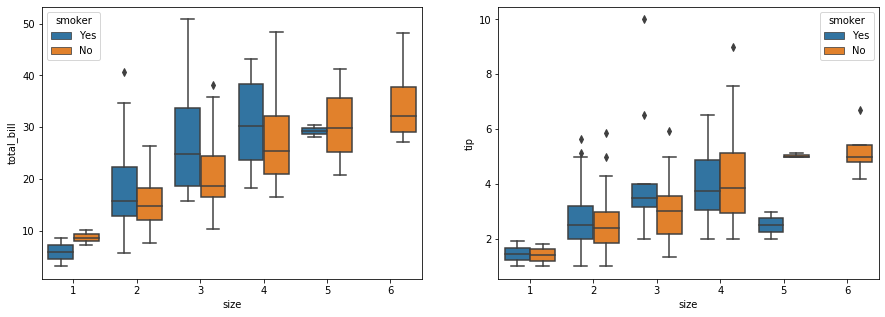

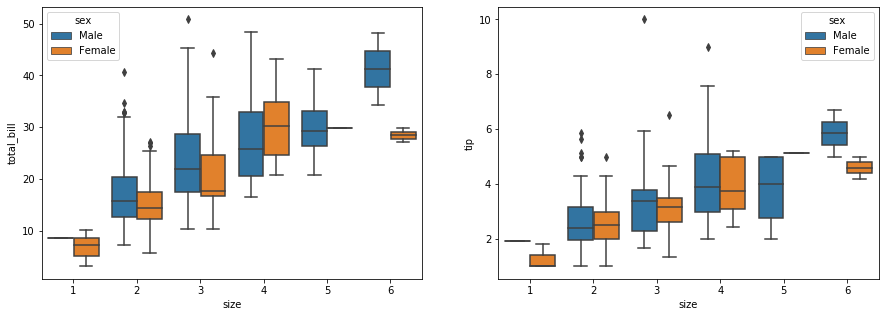

In [86]:
fig= plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = df)
plt.subplot(122)
sns.boxplot(x = "day", y = "tip", hue = "sex", data = df)
plt.show()

fig= plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.boxplot(x = "size", y = "total_bill", hue = "smoker", data = df)
plt.subplot(122)
sns.boxplot(x = "size", y = "tip", hue = "smoker", data = df)
plt.show()

fig= plt.subplots(1, 2, figsize=(15, 5))
plt.subplot(121)
sns.boxplot(x = "size", y = "total_bill", hue = "sex", data = df)
plt.subplot(122)
sns.boxplot(x = "size", y = "tip", hue = "sex", data = df)
plt.show()

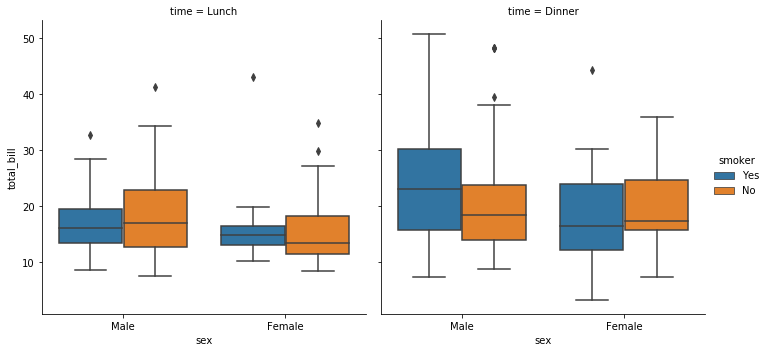

In [55]:
sns.catplot(x= "sex", y= "total_bill", hue ="smoker", col = "time", data=df, kind = "box")

In [56]:
sns.boxplot(data=iris, orient="h")

NameError: name 'iris' is not defined